# Problem 1: Clustering

### A leading bank wants to develop a customer segmentation to give promotional offers to its customers.

### They collected a sample that summarizes the activities of users during the past few months.

### You are given the task to identify the segments based on credit card usage.

# Import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

### Load data¶

In [4]:
df=pd.read_csv("bank_marketing_part1_Data.csv")

### Checking the data

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [5]:
df.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


In [7]:
df.shape

(210, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


## Observation:
### 7 variables and 210 records.
### No missing record based on intial analysis.
### All the variables numeric type.

In [9]:
### checking the missing value
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

## Observation
### No missing value.

In [11]:
## checking for duplicated values
df.duplicated().sum()

0

## Observation¶
### No duplicated value

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


## Observation
#Based on summary descriptive, the data looks good.

#We see for most of the variable, mean/medium are nearly equal.

#Std Deviation is high for spending variable.

## Univariate analysis

In [3]:
list=[]
for i in df:
    list.append(i)

In [4]:
list

['spending',
 'advance_payments',
 'probability_of_full_payment',
 'current_balance',
 'credit_limit',
 'min_payment_amt',
 'max_spent_in_single_shopping']

In [5]:
list1=['spending',
 'advance_payments',
 'probability_of_full_payment',
 'current_balance',
 'credit_limit',
 'min_payment_amt',
 'max_spent_in_single_shopping']

In [6]:
def univariate(column):
    
    print(column)
    
    fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(13,5))

    
    ## boxplot
    sns.boxplot(df[column],ax=axes[0])
    axes[0].set_ylabel(column,fontsize=15)
    axes[0].set_title(" distrubution" + " " + column)


    # distplot
    sns.distplot(df[column],ax=axes[1])
    axes[1].set_xlabel(column, fontsize=15)
    
    
    # histplot
    sns.histplot(df[column],ax=axes[2])
    axes[2].set_xlabel(column, fontsize=15)
    
    
    plt.tight_layout()
    plt.show()
  
    

spending


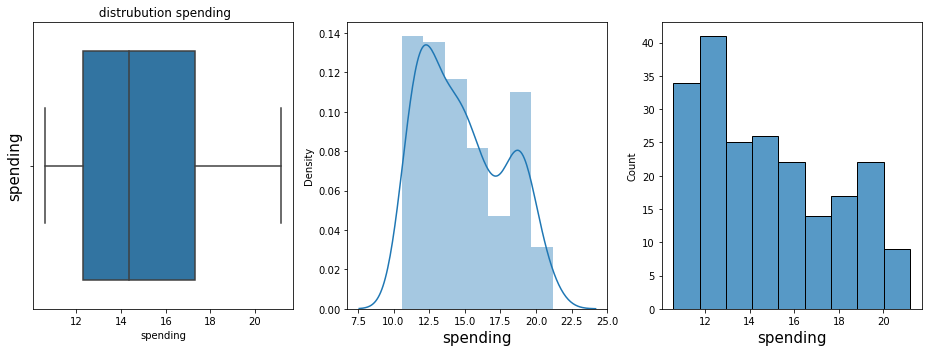

advance_payments


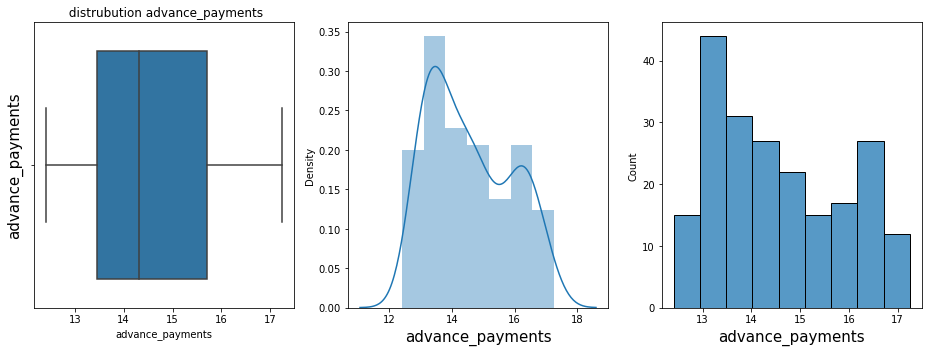

probability_of_full_payment


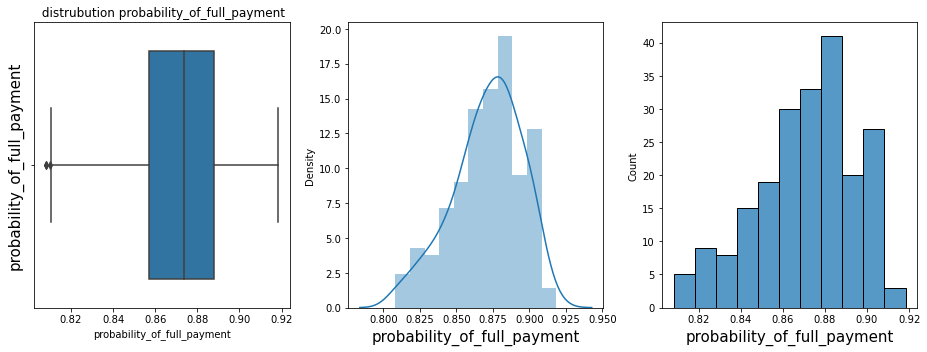

current_balance


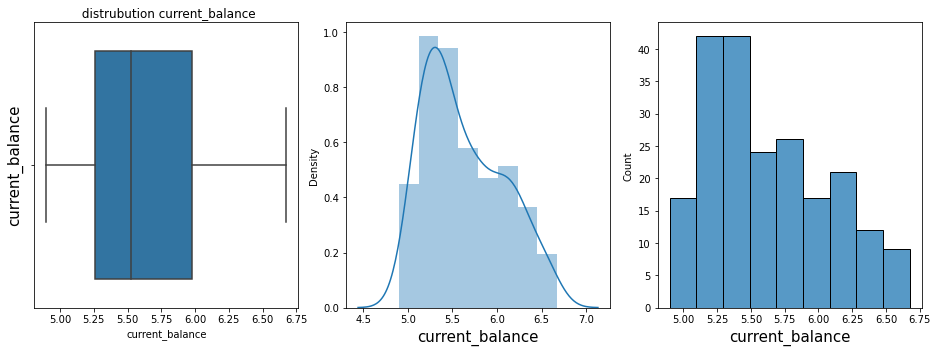

credit_limit


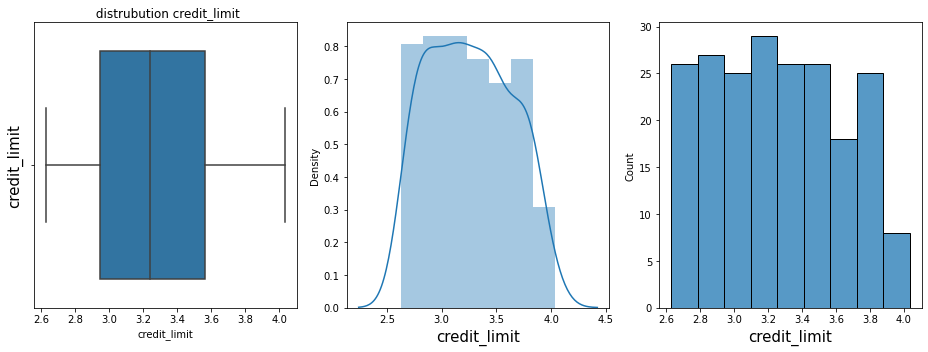

min_payment_amt


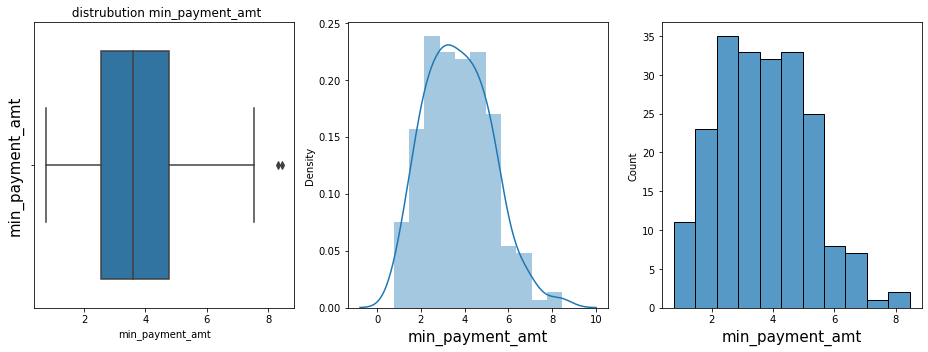

max_spent_in_single_shopping


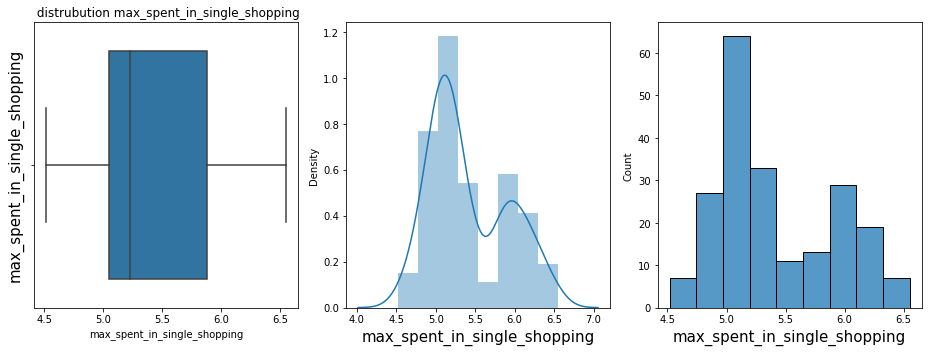

In [7]:
for i in list1:
    
    univariate(i)

## Observation
1.outliers present in min_payment_amt and probability_of_full_payment

2.Distrubtion is skewed to right tail for all the variable execpt probability_of_full_payment variable, which has left tail

In [8]:
# Let's check the skewness values quantitatively
df.skew().sort_values(ascending=False)

max_spent_in_single_shopping    0.561897
current_balance                 0.525482
min_payment_amt                 0.401667
spending                        0.399889
advance_payments                0.386573
credit_limit                    0.134378
probability_of_full_payment    -0.537954
dtype: float64

In [10]:
# lets cheeck the number of outliers
df1=df.copy()
def check_outliers(data):
    vData_num = data.loc[:,data.columns != 'class']
    Q1 = vData_num.quantile(0.25)
    Q3 = vData_num.quantile(0.75)
    IQR = Q3 - Q1
    count = 0
    # checking for outliers, True represents outlier
    vData_num_mod = ((vData_num < (Q1 - 1.5 * IQR)) |(vData_num > (Q3 + 1.5 * IQR)))
    #iterating over columns to check for no.of outliers in each of the numerical attributes.
    for col in vData_num_mod:
        if(1 in vData_num_mod[col].value_counts().index):
            print("No. of outliers in %s: %d" %( col, vData_num_mod[col].value_counts().iloc[1]))
            count += 1
    print("\n\nNo of attributes with outliers are :", count)
    
check_outliers(df)

No. of outliers in probability_of_full_payment: 3
No. of outliers in min_payment_amt: 2


No of attributes with outliers are : 2


In [3]:
# lets remove the outliers
def outlier_treatment(col):
    Q1,Q3=np.percentile(df[col],[25,75])
    IQR=Q3-Q1
    Qmin=Q1-1.5*IQR
    Qmax=Q3+1.5*IQR
    df[col]=np.where(df[col] < Qmin,Qmin,df[col])
    df[col]=np.where(df[col] > Qmax,Qmax,df[col])
    

In [4]:
for col in df.columns:
    outlier_treatment(col)

NameError: name 'df' is not defined

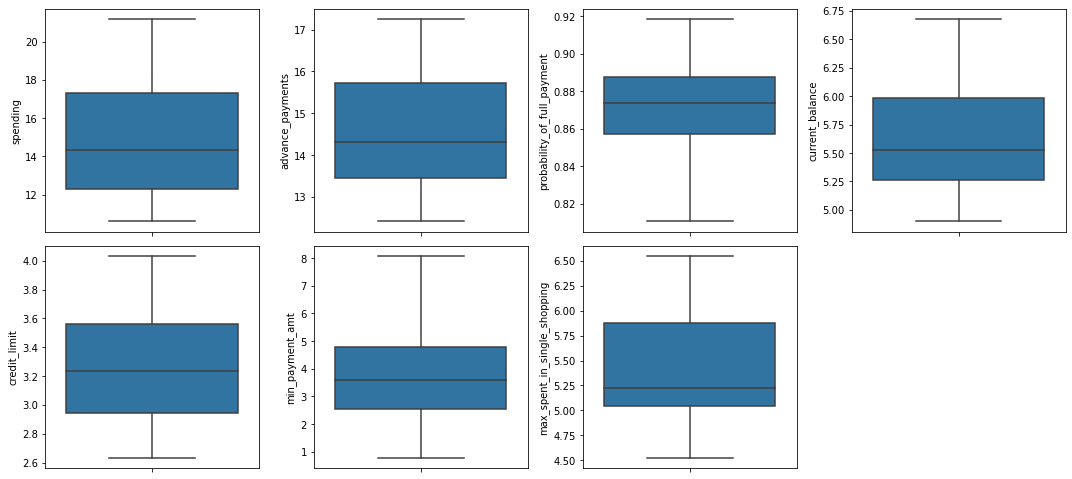

In [26]:
# lets ckeck the outliers using boxplot
plt.figure(figsize=(15,10))
list2=df.columns
for i in range(len(list2)):
    plt.subplot(3,4,i+1)
    sns.boxplot(y=df[list2[i]])
    plt.tight_layout()

In [31]:
check_outliers(df)



No of attributes with outliers are : 0


## observation
#Mostly all outliers are treated

## Multivariate analysis

<Figure size 1080x1080 with 0 Axes>

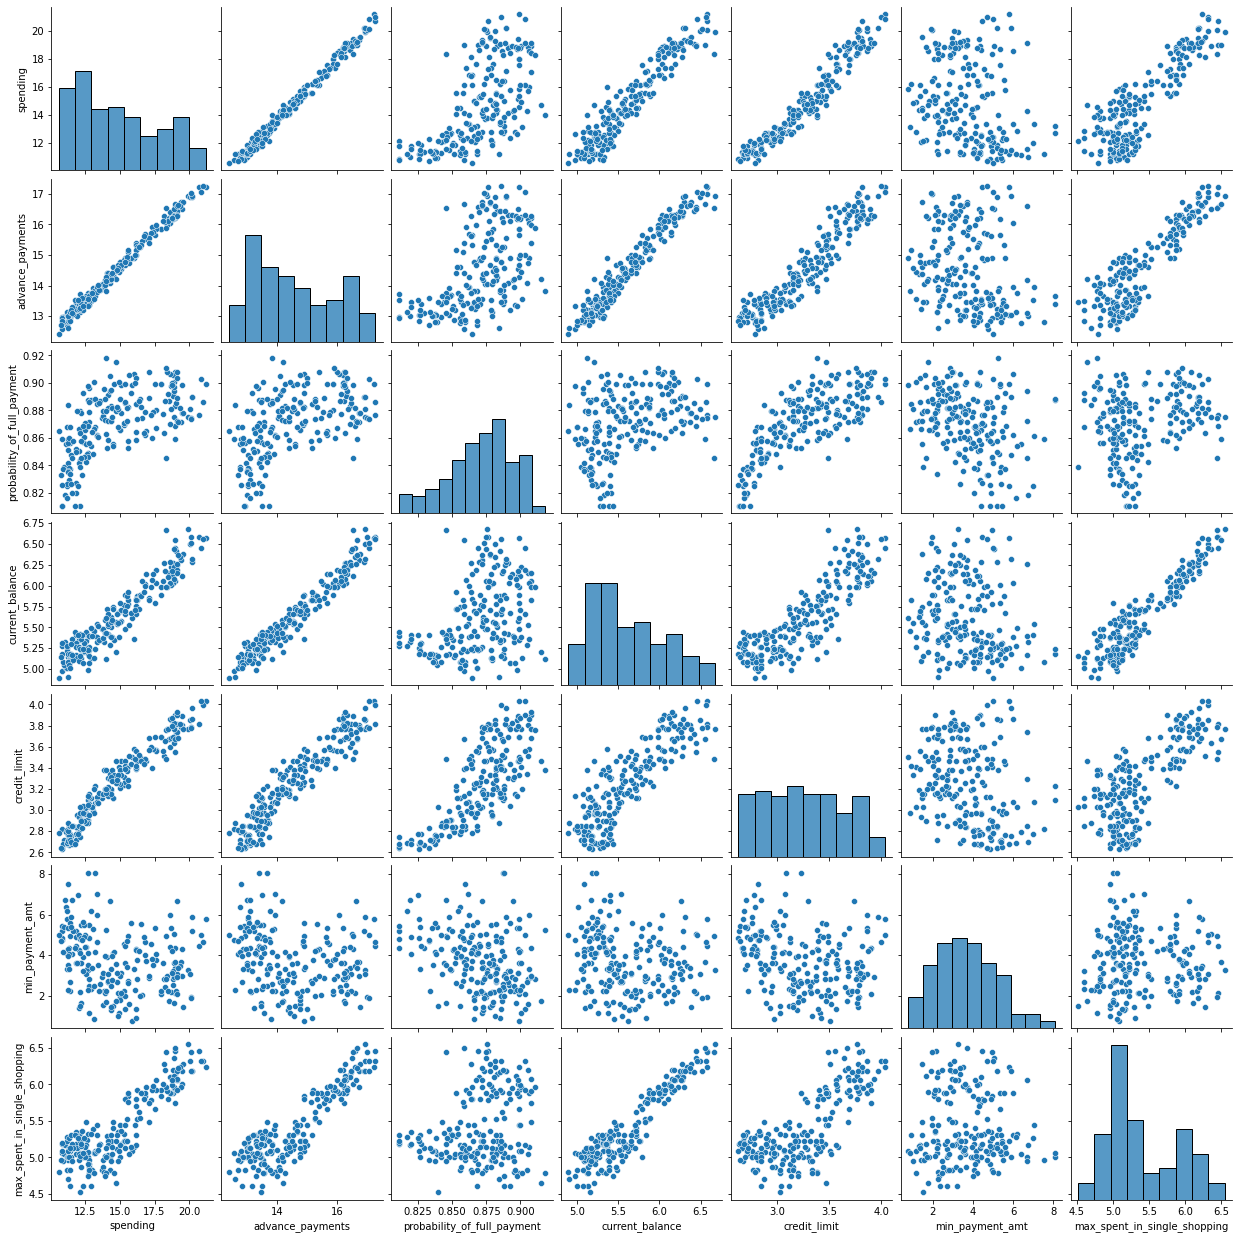

In [28]:
plt.figure(figsize=(15,15))
sns.pairplot(df)

### observation
#There are few good correlation between variables such as spending & advance payments, spending & current balance,
#spending and credit_limit,spending & max_spent_in_single_shopping etc.

#No such variables is compltely normally distributed. Variabels such as probability_of_full_payment is left-skewed
#and probability_of_full_payment is right skewed.

In [29]:
#correlation matrix

df.corr().T

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608900,0.949985,0.970771,-0.229619,0.863693
advance_payments,0.994341,1.000000,0.529925,0.972422,0.944829,-0.217051,0.890784
probability_of_full_payment,0.608900,0.529925,1.000000,0.368419,0.762218,-0.335071,0.227140
current_balance,0.949985,0.972422,0.368419,1.000000,0.860415,-0.170701,0.932806
credit_limit,0.970771,0.944829,0.762218,0.860415,1.000000,-0.258980,0.749131
min_payment_amt,-0.229619,-0.217051,-0.335071,-0.170701,-0.258980,1.000000,-0.009605
max_spent_in_single_shopping,0.863693,0.890784,0.227140,0.932806,0.749131,-0.009605,1.000000


<AxesSubplot:>

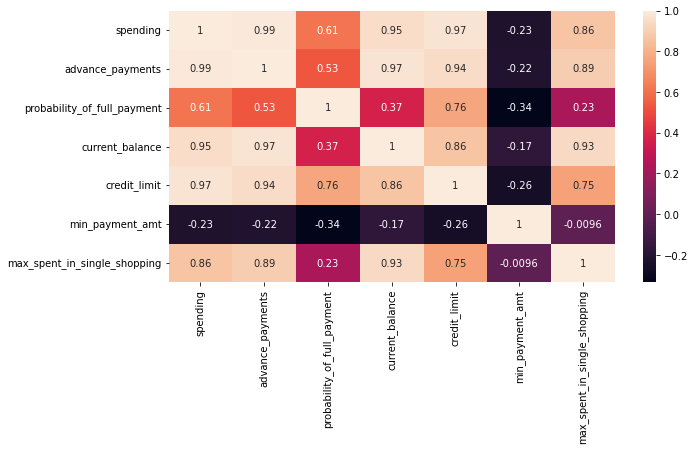

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True) 
#From the heatmap we can see there are lots of variable having extremely good correlations

# 1.2 Do you think scaling is necessary for clustering in this case? Justify

#Yes, we will have to apply the scaling as Hierarichal and Kmeans both used distance based algorithms for calculation. 

#Moreover if we look at the data, we can notice that some of the variables are on different scales.For example
#probability_of_full_payment is on 10^(-4) scale whereas spending is on hundredth scale. Hence its become more necessary to
#scale the data.

#Moreover we will go for zscaling as the variance between the columns are more or less same.

In [34]:
from scipy.stats import zscore

In [35]:
scaled_df=df.apply(zscore)

In [36]:
scaled_df

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813
...,...,...,...,...,...,...,...
205,-0.329866,-0.413929,0.722220,-0.428801,-0.158181,0.193620,-1.366631
206,0.662292,0.814152,-0.307399,0.675253,0.476084,0.819993,0.789153
207,-0.281636,-0.306472,0.364831,-0.431064,-0.152873,-1.328049,-0.830235
208,0.438367,0.338271,1.232775,0.182048,0.600814,-0.957188,0.071238


In [38]:
scaled_df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,9.148766e-16,1.097006e-16,1.642601e-15,-1.089076e-16,-2.994298e-16,1.512018e-16,-1.935489e-15
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.571391e+00,-1.650501e+00,-1.668209e+00,-1.966425e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-6.009681e-01,-8.286816e-01,-8.349072e-01,-7.616981e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.031721e-01,-2.376280e-01,-5.733534e-02,-6.591519e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.126469e-01,7.945947e-01,8.044956e-01,7.185591e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.011371e+00,2.367533e+00,2.055112e+00,2.938945e+00,2.328998e+00


# 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [39]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [40]:
wardlink=linkage(scaled_df,method='ward')

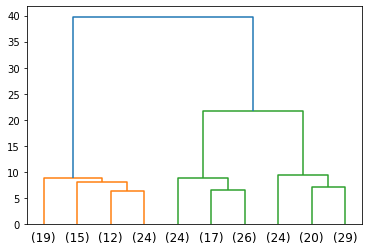

In [55]:
dend=dendrogram(wardlink,truncate_mode='lastp',p=10)

# observation
From the dendogram, we can see that whole data could be divided into 2 clusters. Let us explore the data in both the cluster in below steps.

In [42]:
from scipy.cluster.hierarchy import fcluster

In [43]:
clusters =fcluster(wardlink,2,criterion='maxclust')  
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [45]:
df_cluster=df.copy()

In [46]:
df_cluster['clusters']=clusters

In [47]:
df_cluster.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [50]:
df_cluster['clusters'].value_counts().sort_index()

1     70
2    140
Name: clusters, dtype: int64

In [51]:
df_cluster[df_cluster['clusters']==1].describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0
mean,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,1.0
std,1.381233,0.599277,0.014767,0.245926,0.174909,1.208271,0.251132,0.0
min,15.380000,14.860000,0.845200,5.709000,3.268000,1.472000,5.443000,1.0
25%,17.330000,15.737500,0.874700,5.979250,3.554250,2.845500,5.877000,1.0
50%,18.720000,16.210000,0.883950,6.148500,3.693500,3.629000,5.981500,1.0
75%,19.137500,16.557500,0.898225,6.312000,3.804750,4.459250,6.187750,1.0
max,21.180000,17.250000,0.910800,6.675000,4.033000,6.682000,6.550000,1.0


In [52]:
df_cluster[df_cluster['clusters']==2].describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.0
mean,13.085571,13.766214,0.864338,5.363714,3.045593,3.726353,5.103421,2.0
std,1.550003,0.696916,0.024315,0.230740,0.249454,1.622319,0.226834,0.0
min,10.590000,12.410000,0.810588,4.899000,2.630000,0.765100,4.519000,2.0
25%,11.817500,13.207500,0.848075,5.179000,2.835250,2.461750,5.000000,2.0
50%,12.770000,13.665000,0.865800,5.351000,3.037000,3.597500,5.091500,2.0
75%,14.347500,14.305000,0.882075,5.521750,3.234500,4.879250,5.222500,2.0
max,16.630000,15.460000,0.918300,6.053000,3.582000,8.079625,5.879000,2.0


# Outcomes
1)Looking at the mean and sd we can see that the customer belonging to cluster 1 has higher spending habit as compared to cluster2

2)Customer from cluster 1 are better at advance_payments than cluster 2.

3)Customer from cluster 1 are spending more in single shopping.

4)There is a marginal difference between credit_limit.

# Suggestions
1) As customers from cluster 1 have better records, we can consider them as our premium customers.We can introduce cashback offers for them to encourage more on spending.

2) As there is marginal diffence in credit_limit between our premium and normal customers, it would be good if we can increase the credit limit for our premium customers.Moreover there is a strong correlation between spending and credit limit. So we should increase the credit limit for both the customer segments.

3)Customer from cluster 2 lacks in advance payment. We can introduce some schemes like doubling of reward point if someone pays in advance.

4) To increase the minimum paying amount, we can introduce some cashback offers on a minimum purchase upto certain amount.


# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [56]:
from sklearn.cluster import KMeans

In [57]:
k_means=KMeans(n_clusters=3) 

In [59]:
k_means.fit(scaled_df)

KMeans(n_clusters=3)

In [60]:
k_means.labels_

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2])

In [61]:
k_means.inertia_     ##Total WSS corresponding to k=3
                    #WSS = dist between every observation with the centroid of cluster, squaring it up and then adding 
 

430.2984817512229

In [67]:
k_means=KMeans(n_clusters=2)  #Considering no. of clusters =2 
k_means.fit(scaled_df) 
k_means.inertia_ 

659.1474009548498

In [73]:
k_means=KMeans(n_clusters=1)  #Considering no. of clusters =1
k_means.fit(scaled_df) 
k_means.inertia_ 

1470.0

In [69]:
k_means=KMeans(n_clusters=4)  #Considering no. of clusters =4
k_means.fit(scaled_df) 
k_means.inertia_ 

370.86859623942064

In [68]:
k_means=KMeans(n_clusters=5)  #Considering no. of clusters =5
k_means.fit(scaled_df) 
k_means.inertia_ 

326.8846407681857

In [74]:
wss=[]
for i in range(1,9):
    k_means=KMeans(n_clusters=i)
    k_means=k_means.fit(scaled_df)
    wss.append(k_means.inertia_)

In [119]:
wss

[1470.0,
 659.1474009548498,
 430.2984817512229,
 370.86859623942064,
 327.1982813941246,
 291.93740705004655,
 263.9862250073626,
 241.17275979638367]

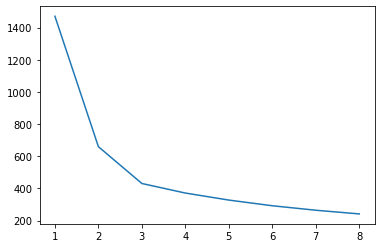

In [120]:
plt.plot(range(1,9), wss) 

#2 or 3 will be our optimum number of clusters. There has been a significant drop in wss value while moving from cluster 1 till 3
#After that there's a marginal decrease in wss value.              
#Let us consider both the values i.e 2 & 3 and then consider which cluster is segmenting better.
#Let us start from no. of clusters =2

In [121]:
df_cluster2=df.copy()

In [123]:
k_means=KMeans(n_clusters=2)
k_means=k_means.fit(scaled_df)
labels=k_means.labels_
labels

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [124]:
df_cluster2['Klabels']=labels

In [125]:
df_cluster2.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Klabels
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,0
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,1
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,0
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,0


In [126]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [127]:
silhouette_score(scaled_df,labels)

0.46560100442748986

In [128]:
print(silhouette_score(scaled_df,labels))
df_cluster2['silhouette_samples']=silhouette_samples(scaled_df,labels)
df_cluster2.head()

0.46560100442748986


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Klabels,silhouette_samples
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,0,0.603352
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,1,0.009064
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,0,0.677371
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,1,0.496964
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,0,0.547020


In [134]:
df_cluster2['silhouette_samples'].describe()

count    210.000000
mean       0.465601
std        0.165491
min       -0.005677
25%        0.377048
50%        0.522136
75%        0.589357
max        0.677371
Name: silhouette_samples, dtype: float64

In [133]:
df_cluster2[df_cluster2['Klabels']==0].describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Klabels,silhouette_samples
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.0,77.000000
mean,18.158571,16.054805,0.883817,6.127429,3.660519,3.480417,5.971740,0.0,0.509917
std,1.483999,0.641792,0.015177,0.257327,0.186514,1.281527,0.294989,0.0,0.163808
min,15.380000,14.860000,0.845200,5.618000,3.231000,0.765100,5.091000,0.0,0.014235
25%,16.840000,15.550000,0.873500,5.920000,3.505000,2.553000,5.837000,0.0,0.443593
50%,18.550000,16.180000,0.882900,6.113000,3.684000,3.368000,5.965000,0.0,0.583038
75%,19.110000,16.500000,0.898400,6.285000,3.796000,4.391000,6.185000,0.0,0.624293
max,21.180000,17.250000,0.910800,6.675000,4.033000,6.682000,6.550000,0.0,0.677371


In [135]:
df_cluster2[df_cluster2['Klabels']==1].describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Klabels,silhouette_samples
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.0,133.000000
mean,12.930602,13.693459,0.863619,5.339699,3.025917,3.822845,5.081737,1.0,0.439944
std,1.428131,0.635028,0.024403,0.208434,0.238913,1.596378,0.199294,0.0,0.161570
min,10.590000,12.410000,0.810588,4.899000,2.630000,0.855100,4.519000,1.0,-0.005677
25%,11.750000,13.190000,0.847300,5.176000,2.821000,2.587000,4.963000,1.0,0.351680
50%,12.720000,13.570000,0.865700,5.333000,3.026000,3.638000,5.089000,1.0,0.494392
75%,14.110000,14.210000,0.881900,5.479000,3.201000,4.924000,5.220000,1.0,0.567703
max,15.990000,14.940000,0.918300,5.789000,3.582000,8.079625,5.491000,1.0,0.616247


In [96]:
df_cluster2[df_cluster2['silhouette_samples'] < 0].count()

spending                        1
advance_payments                1
probability_of_full_payment     1
current_balance                 1
credit_limit                    1
min_payment_amt                 1
max_spent_in_single_shopping    1
Klabels                         1
silhouette_samples              1
dtype: int64

In [97]:
#We can see that the minimum values of silhouette score for some rows has reached negative which means the classification 
#is not proper for few records.


In [136]:
df_cluster2[df_cluster2['silhouette_samples'] < 0]  #There is one record having negative silhouette score

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Klabels,silhouette_samples
102,15.38,14.66,0.899,5.477,3.465,3.6,5.439,1,-0.005677


In [137]:
k_means=KMeans(n_clusters=3)  #Let us consider number of clusters to be 3
k_means=k_means.fit(scaled_df)
labels3=k_means.labels_
labels3

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2])

In [138]:
df_cluster3=df.copy()

In [147]:
df_cluster3['klabels']=labels3

In [148]:
df_cluster3.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,silhouette_samples,klabels
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,0.573278,0
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,0.365564,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,0.637092,0
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,0.515595,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,0.360972,0


In [149]:

print(silhouette_score(scaled_df,labels3))
df_cluster3['silsilhouette_score(scaled_df,labels3)

0.4008059221522216

In [150]:
print(silhouette_score(scaled_df,labels3))
df_cluster3['silhouette_samples']=silhouette_samples(scaled_df,labels3)
df_cluster3.head()

0.4008059221522216


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,silhouette_samples,klabels
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,0.573278,0
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,0.365564,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,0.637092,0
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,0.515595,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,0.360972,0


In [142]:
df_cluster3['silhouette_samples'].describe()

count    210.000000
mean       0.400806
std        0.167582
min        0.002769
25%        0.296831
50%        0.461799
75%        0.523373
max        0.638681
Name: silhouette_samples, dtype: float64

In [144]:
#There is no record having negative silhouette score. Although the mean value of silhouette score is less but we will proceed
#with number of clusters=3

In [151]:
df_cluster3.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,silhouette_samples,klabels
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.871025,5.628533,3.258605,3.697288,5.408071,0.400806,1.019048
std,2.909699,1.305959,0.023560,0.443063,0.377714,1.494689,0.491480,0.167582,0.812356
min,10.590000,12.410000,0.810588,4.899000,2.630000,0.765100,4.519000,0.002769,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.296831,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,0.461799,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,0.523373,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.079625,6.550000,0.638681,2.000000


In [153]:
df_cluster3['klabels'].value_counts().sort_values()

0    67
2    71
1    72
Name: klabels, dtype: int64

# 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [155]:
df_cluster3[df_cluster3['klabels'] == 0].describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,silhouette_samples,klabels
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.0
mean,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,0.468077,0.0
std,1.277122,0.546439,0.014917,0.237807,0.166014,1.211052,0.229566,0.153426,0.0
min,15.560000,14.890000,0.845200,5.718000,3.387000,1.472000,5.484000,0.030368,0.0
25%,17.590000,15.855000,0.874650,6.011500,3.564500,2.848000,5.879000,0.418991,0.0
50%,18.750000,16.230000,0.882900,6.153000,3.719000,3.619000,6.009000,0.522797,0.0
75%,19.145000,16.580000,0.898050,6.328000,3.808000,4.421000,6.192500,0.573763,0.0
max,21.180000,17.250000,0.910800,6.675000,4.033000,6.682000,6.550000,0.638681,0.0


In [156]:
df_cluster3[df_cluster3['klabels'] == 1].describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,silhouette_samples,klabels
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.0
mean,11.856944,13.247778,0.848330,5.231750,2.849542,4.733892,5.101722,0.399556,1.0
std,0.714801,0.355208,0.019800,0.141795,0.138689,1.332248,0.184012,0.159393,0.0
min,10.590000,12.410000,0.810588,4.899000,2.630000,1.502000,4.519000,0.002769,1.0
25%,11.255000,12.992500,0.835000,5.139250,2.738500,4.032250,5.001000,0.316372,1.0
50%,11.825000,13.250000,0.848600,5.225000,2.836500,4.799000,5.089000,0.459725,1.0
75%,12.395000,13.482500,0.861475,5.337250,2.967000,5.463750,5.223500,0.516781,1.0
max,13.340000,13.950000,0.888300,5.541000,3.232000,8.079625,5.491000,0.588665,1.0


In [157]:
df_cluster3[df_cluster3['klabels'] == 2].describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,silhouette_samples,klabels
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.0
mean,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,0.338593,2.0
std,1.056513,0.525706,0.015502,0.225266,0.154766,1.176440,0.269558,0.166214,0.0
min,12.080000,13.150000,0.852700,4.984000,2.936000,0.765100,4.605000,0.004485,2.0
25%,13.820000,14.030000,0.871300,5.380000,3.155000,1.951000,4.958500,0.232968,2.0
50%,14.430000,14.390000,0.881900,5.541000,3.258000,2.640000,5.132000,0.369166,2.0
75%,15.260000,14.760000,0.893350,5.689500,3.378000,3.332000,5.263500,0.478726,2.0
max,16.440000,15.270000,0.918300,5.920000,3.582000,6.685000,5.879000,0.552973,2.0


## observation

Comparing 3 clusters with each other. Observations and suggestions

People from cluster 2 is spending the most, followed by cluster 0. Cluster 1 has lowest spending.

Credit limit for cluster 2 customers is highest,followed by cluster 0 and then cluster 1

Credit limit for cluster 1 should be increased.

Current balance for cluster 1 and cluster 0 is quite less as compared to cluster 2